In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Customer churn prediction



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
import pandas as pd

data = pd.read_csv('/kaggle/input/data-customer-churn/Telco-Customer-Churn.csv')

# Display the first few rows
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

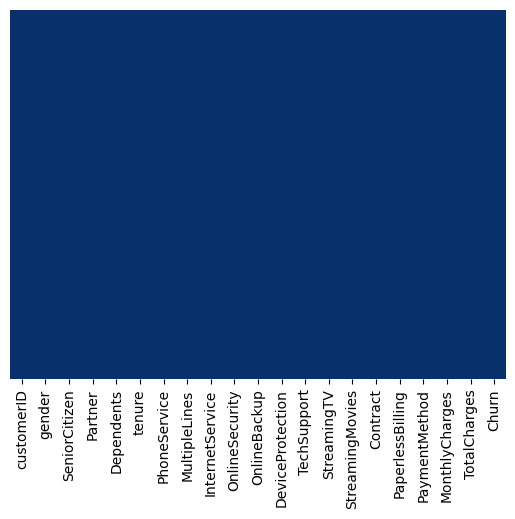

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="Blues_r")

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [12]:
nan_cols = [i for i in data.columns if data[i].isnull().any()]
nan_cols

['TotalCharges']

## Although there are no missing values some values had the space in it as a value. hence when changing the format of the data is produces NAN values.

In [14]:
# there were ten null values after changing the data type of the TotalCharges variable. hence removed those points.
data.dropna(subset = ["TotalCharges"], inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [16]:
data.shape

(7032, 21)

In [17]:
# There are no duplicate rows in the dataset.
duplicateRows = data[data.duplicated()]
duplicateRows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
# The unnamed column was dropeed since it was a index column and customer Id column also dropped since it is a unique value column.
data= data.drop(['customerID'], axis=1) 

#### check for categoriacl varialbe labels

In [19]:
def cat_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [20]:
cat_unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Some of the columns have no internet service or no phone service, that can be replaced with a simple No



In [21]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [22]:
cat_unique_col_values(data)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


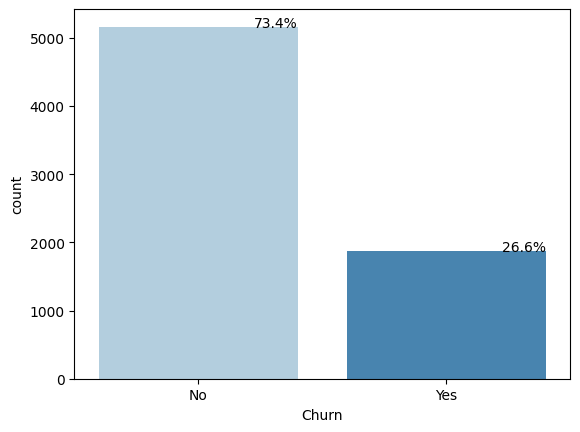

In [23]:
ax = sns.countplot(x="Churn", data=data, palette="Blues")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

Text(0.5, 1.0, 'percentage of Senior Citizens')

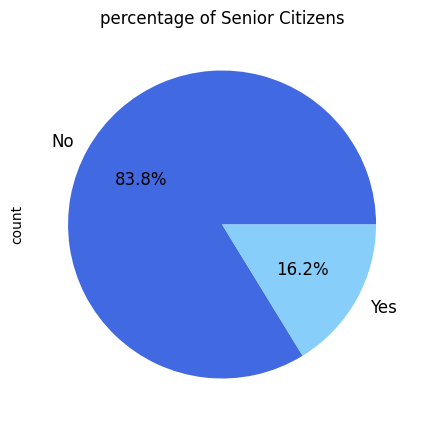

In [24]:
#Pie chart of percentages of senior citizens
import matplotlib.ticker as mtick
ax = (data['SeniorCitizen'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of Senior Citizens', fontsize = 12)

Text(0.5, 1.0, 'percentage of gender')

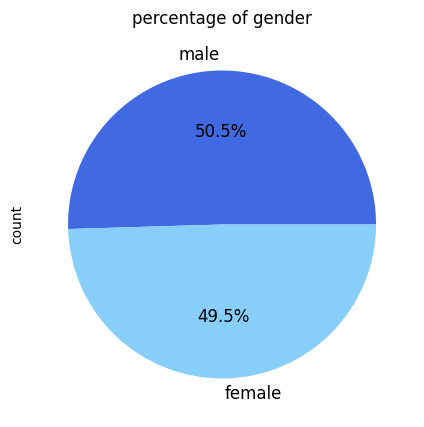

In [25]:
# pie chart of gender of customers
ax = (data['gender'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['male', 'female'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of gender', fontsize = 12)

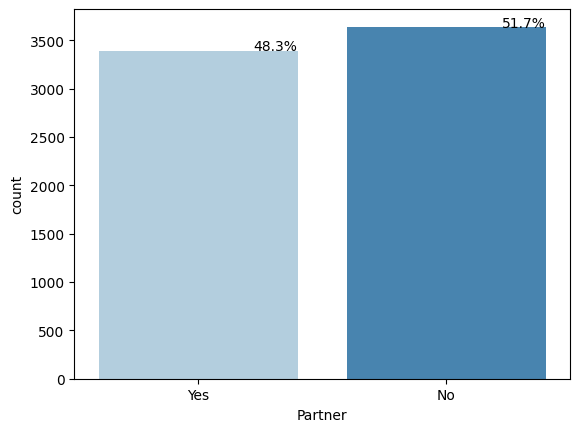

In [26]:
ax = sns.countplot(x="Partner", data=data, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')
plt.show()

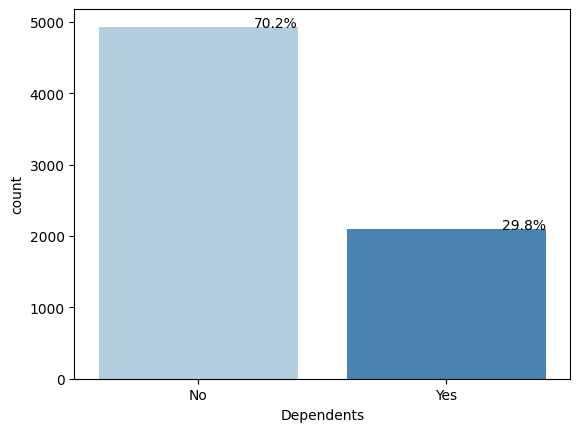

In [27]:
ax = sns.countplot(x="Dependents", data=data, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')
plt.show()

#### There are only 16.2% senior citizens. The gender has equal distribution in this dataset. Around 49% customers have partners. Around 30% customers have dependents.



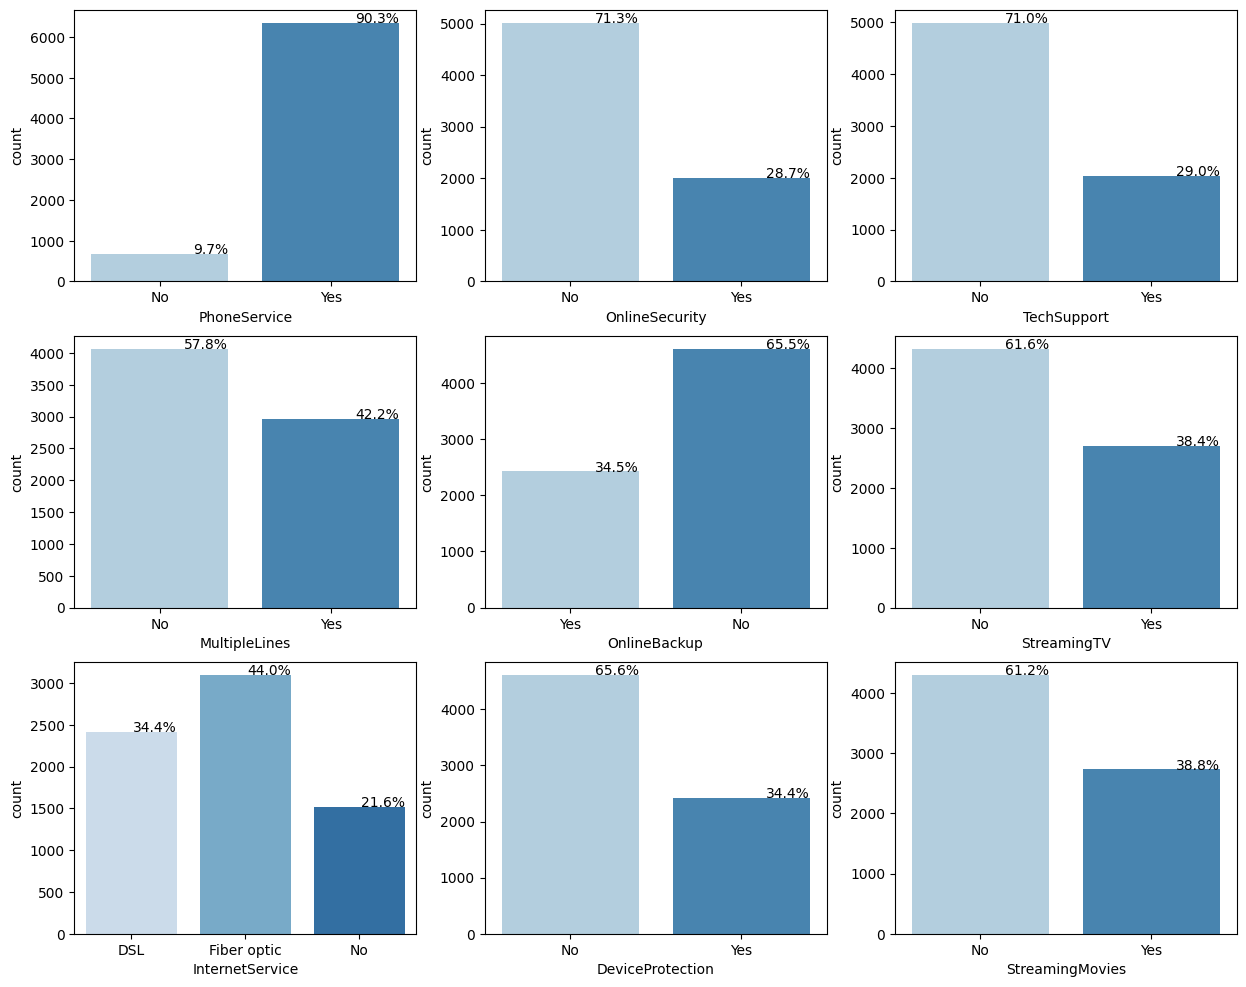

In [28]:
#These are the services provide by the company
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
  if i < 3:
    ax = sns.countplot(x=data[item], data=data, palette="Blues",ax=axes[i,0])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')        
  elif i >=3 and i < 6:
    ax = sns.countplot(x=data[item], data=data, palette="Blues",ax=axes[i-3,1])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right') 
  elif i < 9:
    ax = sns.countplot(x=data[item], data=data, palette="Blues",ax=axes[i-6,2])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right') 

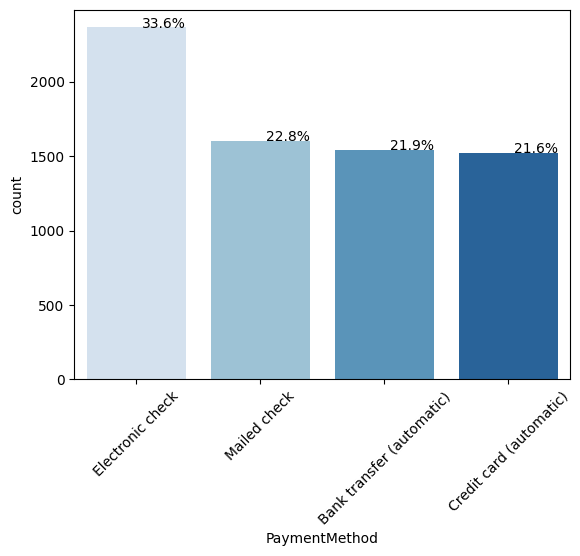

In [29]:
ax = sns.countplot(x="PaymentMethod", data=data, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right') 

##### Tenure is the number of months the customer has stayed with the company.



<ipython-input-31-f2af4c72538d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['tenure'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})


Text(0.5, 1.0, 'no of Customers by their tenure')

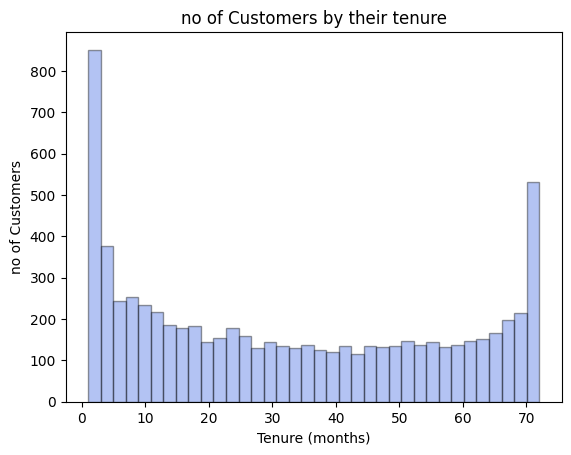

In [31]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
ax = sns.distplot(data['tenure'], hist=True, kde=False, bins=int(180/5), color = 'royalblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('no of Customers by their tenure')


##### After looking at the above histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the company.

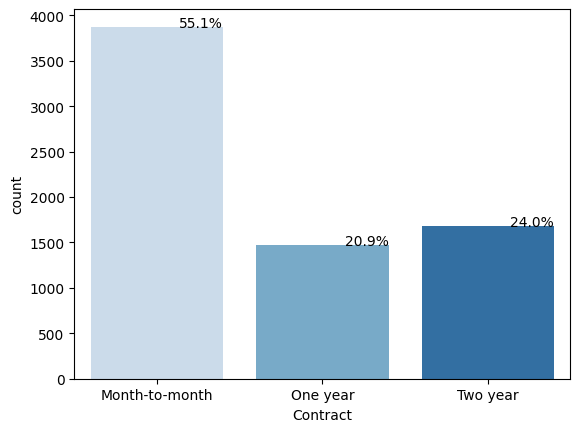

In [32]:
ax = sns.countplot(x="Contract", data=data, palette="Blues")
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(data))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right') 

##### 55% of customers are month to month contract type and most of them have been churned. That is the reason for many customers have low tenure.

<ipython-input-33-a06353a1a3a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
<ipython-input-33-a06353a1a3a0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
<ipython-input-33-a06353a

Text(0.5, 1.0, 'Two Year Contract')

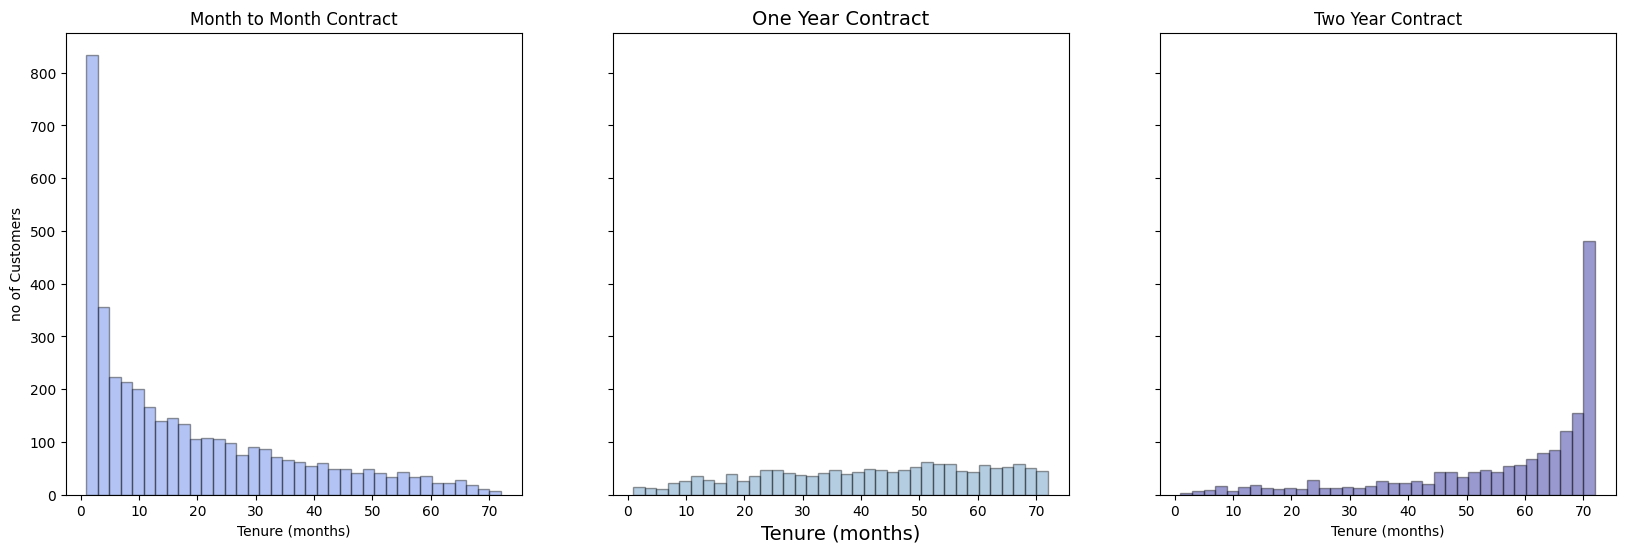

In [33]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'royalblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('no of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

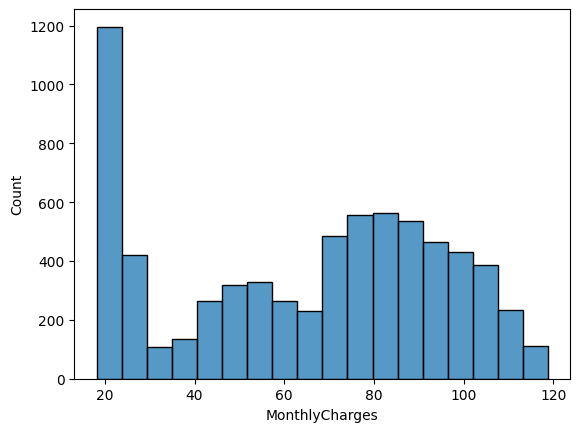

In [34]:
sns.histplot(data=data, x="MonthlyCharges")


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TotalCharges', ylabel='Count'>

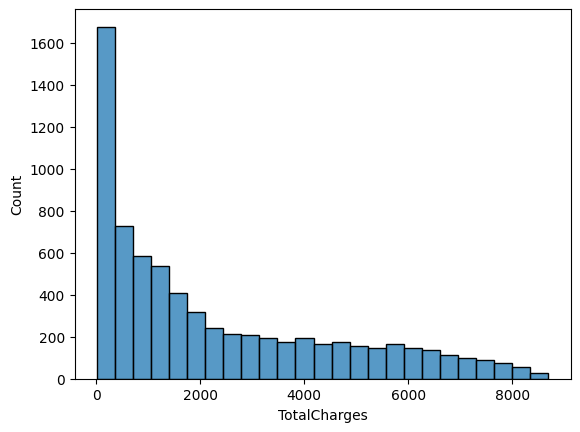

In [35]:
sns.histplot(data=data, x="TotalCharges")


##### most of the customers have low monthly charges which cause for low total charges.



<Axes: xlabel='TotalCharges'>

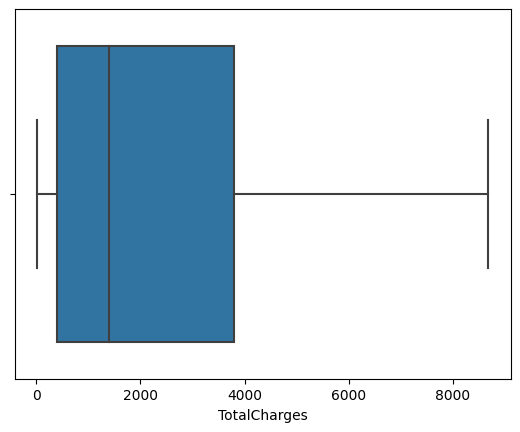

In [36]:
sns.boxplot(x=data['TotalCharges'])


<Axes: xlabel='MonthlyCharges'>

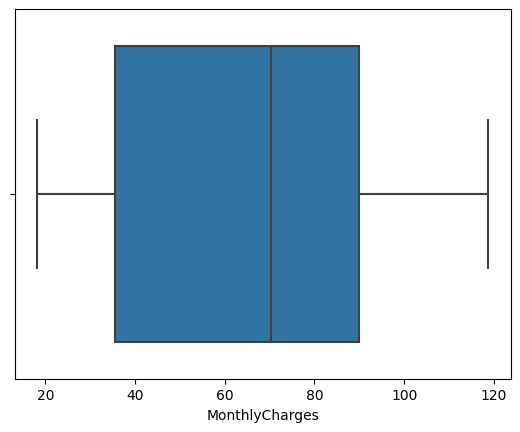

In [37]:
sns.boxplot(x=data['MonthlyCharges'])

<Axes: xlabel='tenure'>

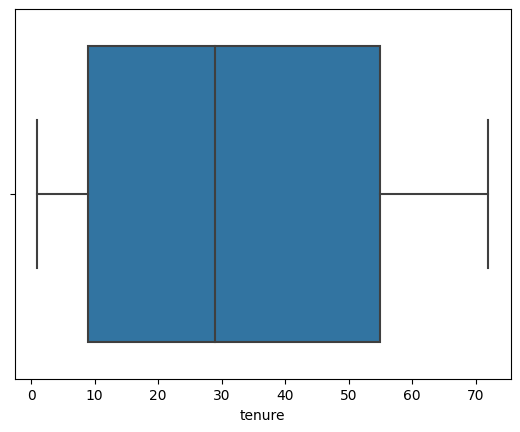

In [38]:
sns.boxplot(x=data['tenure'])

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

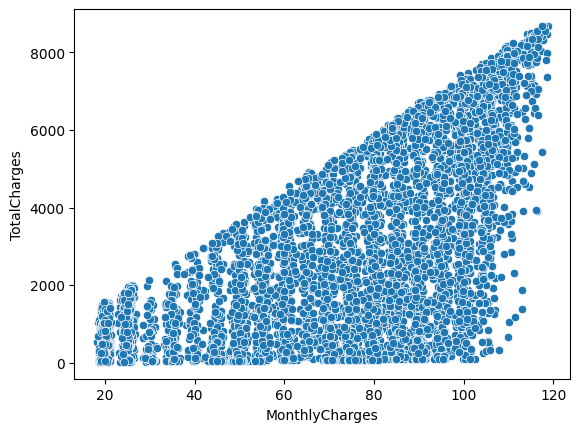

In [39]:
sns.scatterplot(data=data, x="MonthlyCharges", y="TotalCharges")

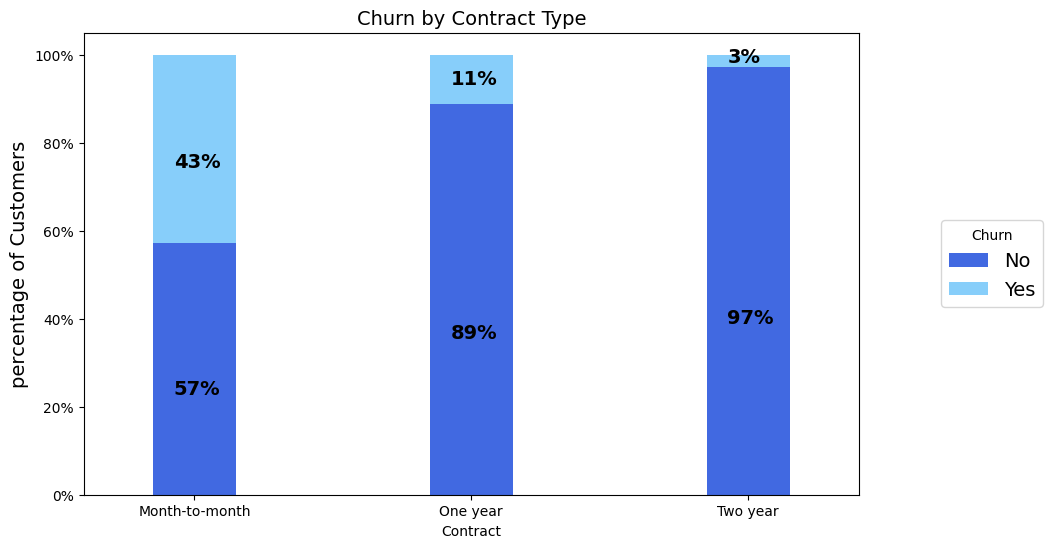

In [40]:
colors = ['royalblue','lightskyblue']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, figsize = (10,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center right',prop={'size':14},title = 'Churn', bbox_to_anchor=(1.25, 0.5))
ax.set_ylabel('percentage of Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size = 14)

##### 43% of month to month contract customers have churned in this company. while only 3% of customers have churned in two year contract type.

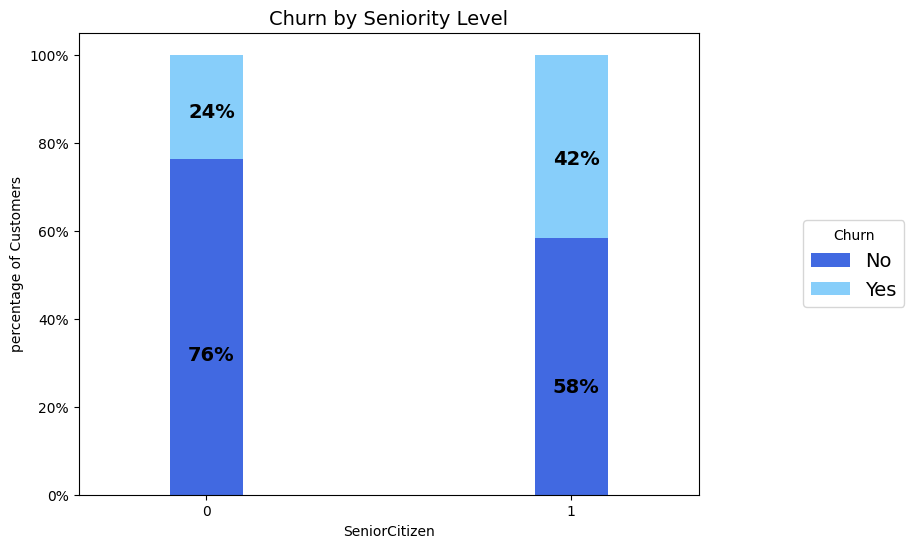

In [41]:
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar', width = 0.2, stacked = True, rot = 0,  figsize = (8,6), color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn',bbox_to_anchor=(1.25, 0.5))
ax.set_ylabel('percentage of Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# add the data labels on the stacked bar chart
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'black',weight = 'bold',size =14)

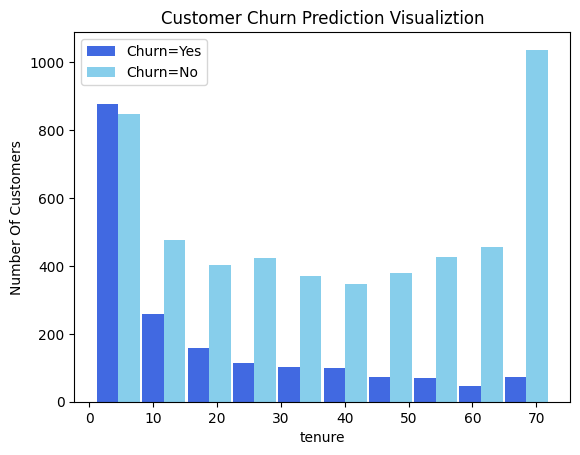

In [42]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
tenure_churn_no = data[data.Churn=='No'].tenure
tenure_churn_yes = data[data.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['royalblue','skyblue'],label=['Churn=Yes','Churn=No'])
plt.legend()

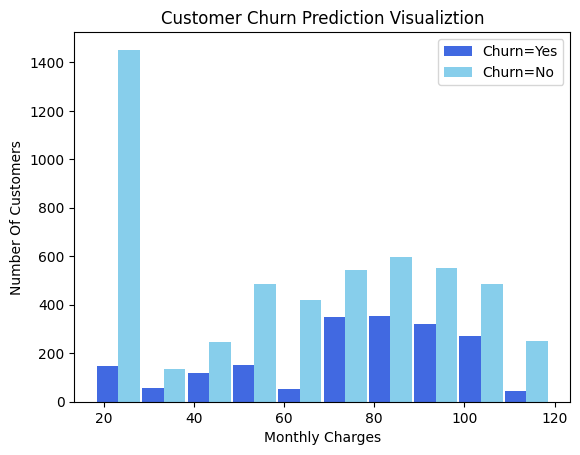

In [43]:
mc_churn_no = data[data.Churn=='No'].MonthlyCharges      
mc_churn_yes = data[data.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['royalblue','skyblue'],label=['Churn=Yes','Churn=No'])
plt.legend()

<ipython-input-44-b2f419700314>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ], color="royalblue", shade = True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-44-b2f419700314>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versio

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

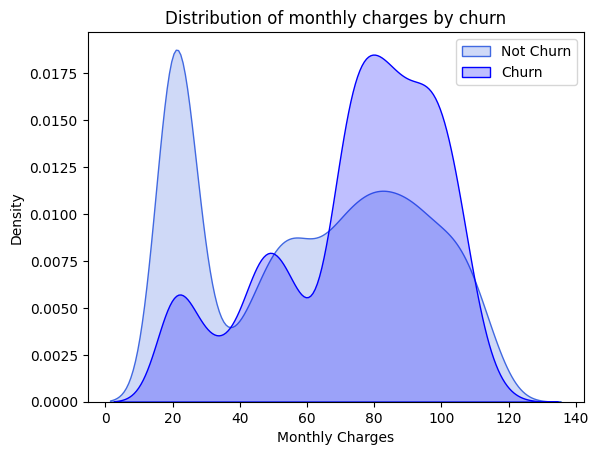

In [44]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ], color="royalblue", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [45]:
# dataset with monthly charges in between 70-110
mc_high_churn_prob = data[(data['MonthlyCharges']>70)& (data['MonthlyCharges']<110)]

In [46]:
# the customers with monthly charges in between 70-110 and churn=yes
churn_data=mc_high_churn_prob[mc_high_churn_prob['Churn']=='Yes']

In [47]:
churn_data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes


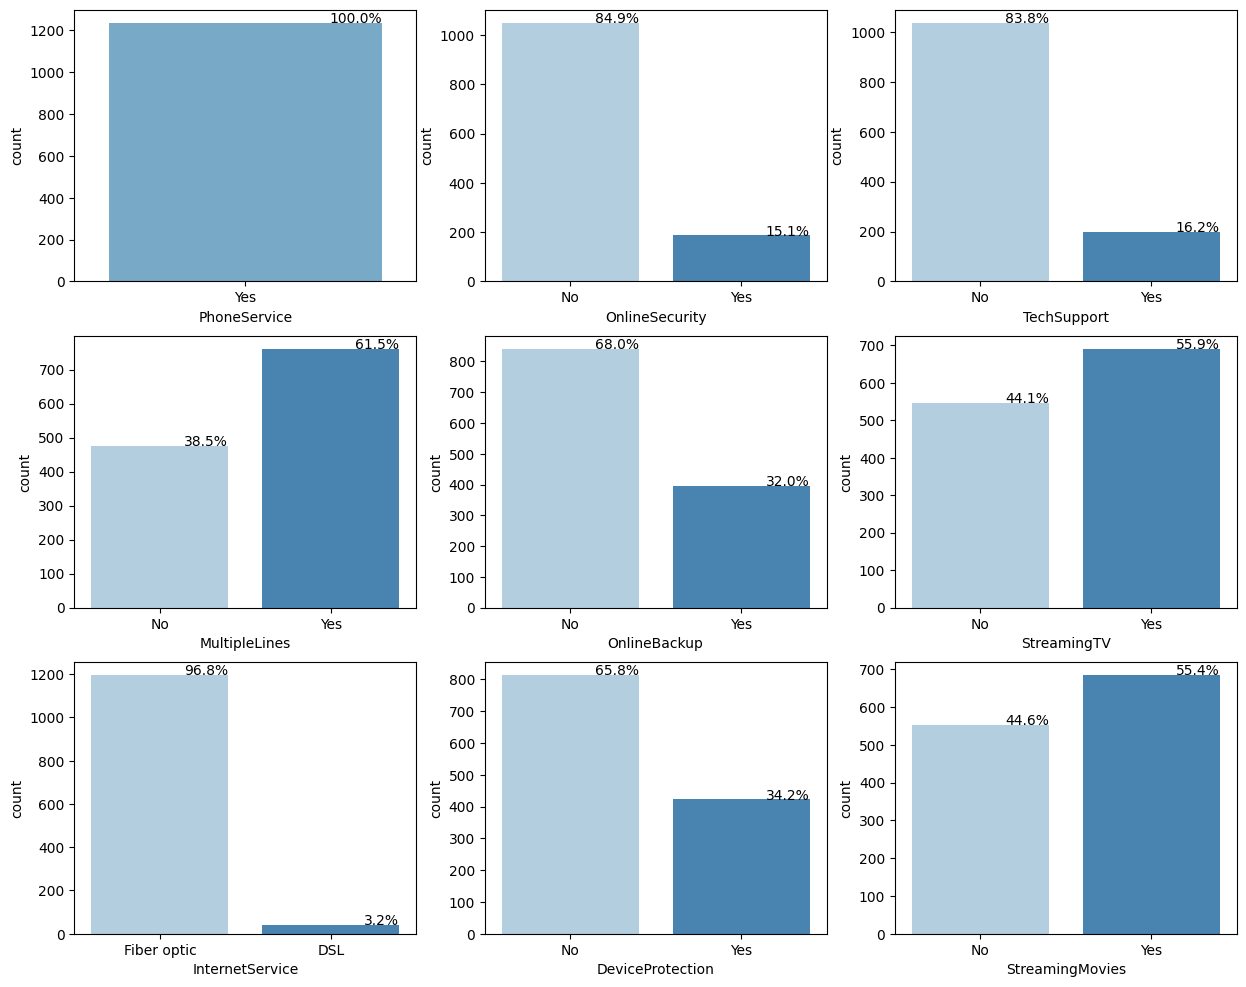

In [48]:
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
  if i < 3:
    ax = sns.countplot(x=churn_data[item], data=churn_data, palette="Blues",ax=axes[i,0])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(churn_data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')        
  elif i >=3 and i < 6:
    ax = sns.countplot(x=churn_data[item], data=churn_data, palette="Blues",ax=axes[i-3,1])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(churn_data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right') 
  elif i < 9:
    ax = sns.countplot(x=churn_data[item], data=churn_data, palette="Blues",ax=axes[i-6,2])
    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/len(churn_data))
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')

#### The customers who have higher chance of churn with high monthly charges, more than 60% do not have online security, tech support, multiple lines, online backup and device protection.

#### In the range of 70-110 of monthly charged customers have higher chance of churning. So the packages for those ranges could be improved.

<ipython-input-49-37319cdaadc5>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ], color="royalblue", shade = True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<ipython-input-49-37319cdaadc5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. C

Text(0.5, 1.0, 'Distribution of total charges by churn')

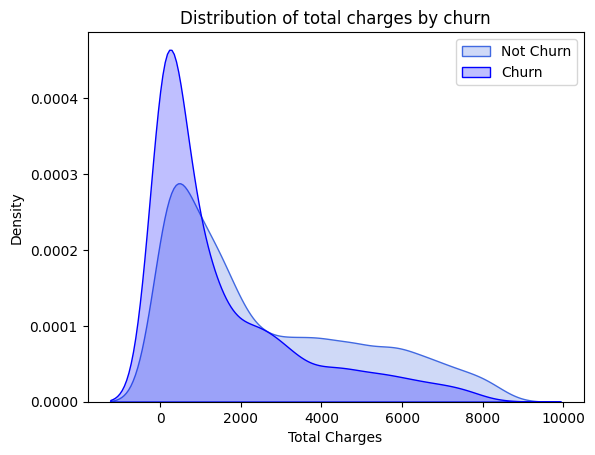

In [49]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ], color="royalblue", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ], ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [50]:
data.shape


(7032, 20)

In [51]:
categorical_cols= data.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols.columns.tolist())} categorical columns')

The dataset contains 16 categorical columns


In [52]:
categorical_cols.describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,4065,3096,5017,4607,4614,4992,4329,4301,3875,4168,2365,5163


In [53]:
for cols in categorical_cols.columns:
  print(cols,':', len(categorical_cols[cols].unique()),'labels')

gender : 2 labels
Partner : 2 labels
Dependents : 2 labels
PhoneService : 2 labels
MultipleLines : 2 labels
InternetService : 3 labels
OnlineSecurity : 2 labels
OnlineBackup : 2 labels
DeviceProtection : 2 labels
TechSupport : 2 labels
StreamingTV : 2 labels
StreamingMovies : 2 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
Churn : 2 labels


##### Dython library was used to measure correlations among variables.



In [54]:
!pip install dython


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


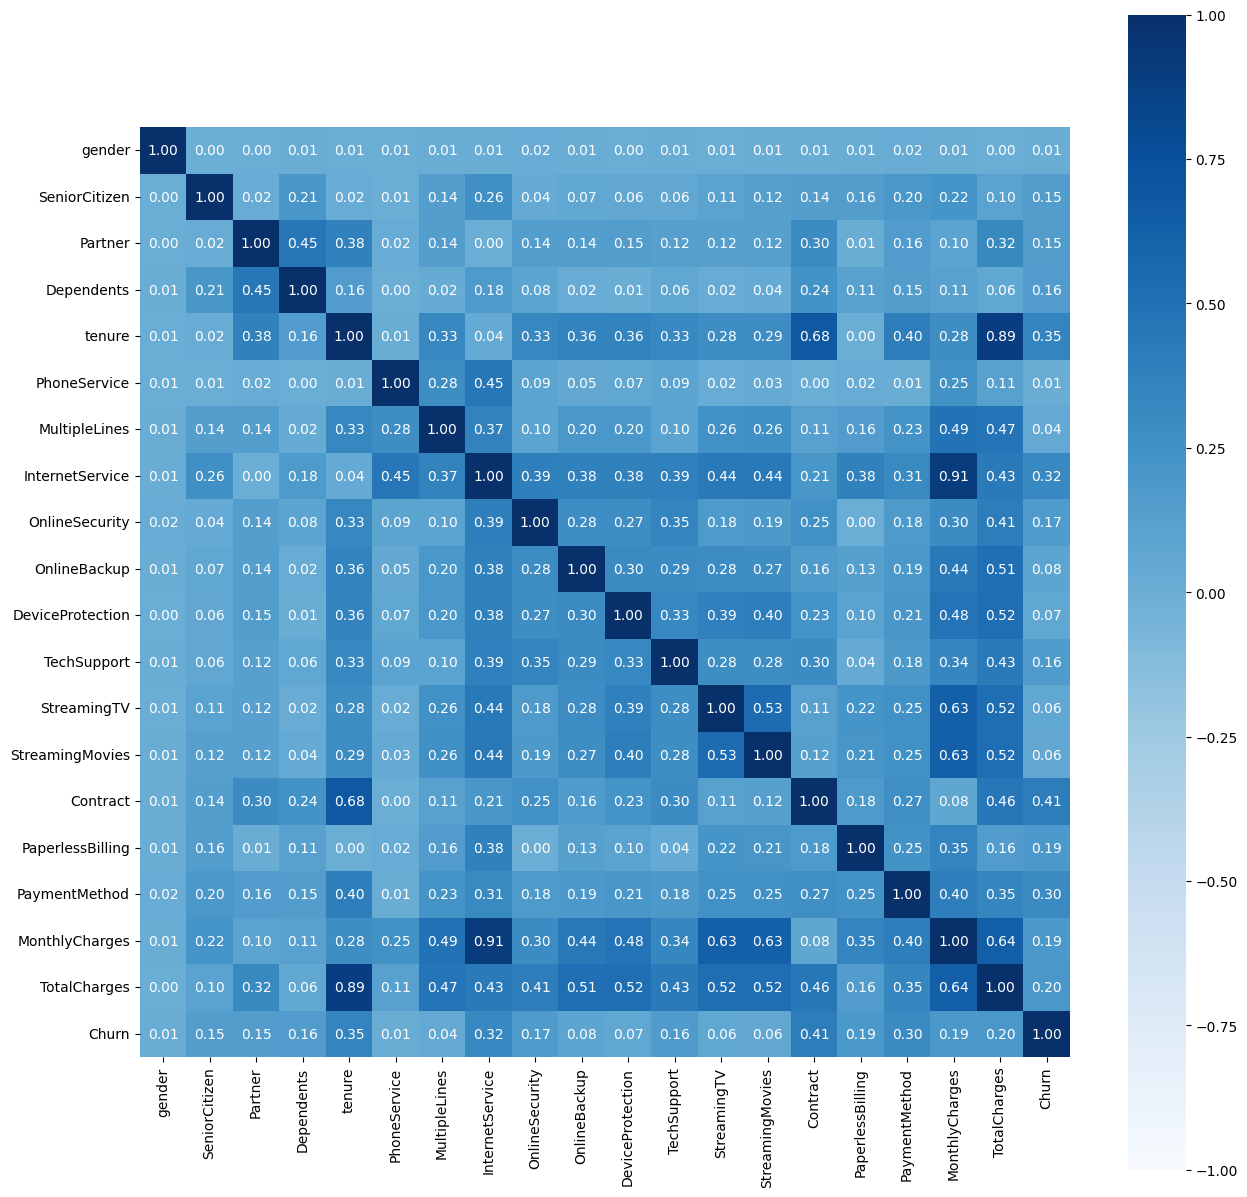

{'corr':                     gender  SeniorCitizen   Partner  Dependents    tenure  \
 gender            1.000000       0.001434  0.001094    0.010038  0.005285   
 SeniorCitizen     0.001434       1.000000  0.016571    0.210129  0.015683   
 Partner           0.001094       0.016571  1.000000    0.451958  0.381912   
 Dependents        0.010038       0.210129  0.451958    1.000000  0.163386   
 tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
 PhoneService      0.007034       0.007739  0.017916    0.000552  0.007877   
 MultipleLines     0.008595       0.142606  0.142273    0.023992  0.332399   
 InternetService   0.011202       0.264920  0.001277    0.178412  0.037532   
 OnlineSecurity    0.016013       0.038150  0.143031    0.080442  0.328297   
 OnlineBackup      0.012794       0.066257  0.141550    0.023312  0.361138   
 DeviceProtection  0.000507       0.059108  0.153257    0.013573  0.361520   
 TechSupport       0.008194       0.060152  0.119892    

In [55]:
from dython.nominal import associations
associations(data,numerical_columns=['tenure','MonthlyCharges','TotalCharges'] ,nom_nom_assoc='cramer',num_num_assoc='spearman',cramers_v_bias_correction=False,
             hide_columns='customerID',hide_rows='customerID',figsize=(15, 15),cmap="Blues")

In [56]:
#creating dummy variables for categorical variables here drop_first determines whether to get k-1 dummies out of k categorical levels by removing the first level.
data = pd.get_dummies(data, drop_first=True)

In [57]:
data.shape

(7032, 24)

In [58]:
data.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [59]:
# scaling numerical features since the ranges are different
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [60]:
data.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.000000,0.115423,0.001275,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.464789,0.385075,0.215867,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,0.014085,0.354229,0.010310,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.619718,0.239303,0.210241,True,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
4,0,0.014085,0.521891,0.015330,False,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True


In [61]:
X = data.drop('Churn_Yes',axis=1)
y = data['Churn_Yes']
# devide the dataset into train and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [64]:
# Import classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, 
    BaggingClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    ConfusionMatrixDisplay, roc_auc_score, roc_curve, 
    precision_recall_curve, auc
)


train accuracy: 0.8051555555555555 
 test accuracy: 0.7967306325515281
auc roc score : 0.8322577558527717
auc score from precision recall curve : 0.6261232940838984


classification report for ridge classifier
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1048
        True       0.64      0.48      0.54       359

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.79      1407



confusion matrix for ridge classifier


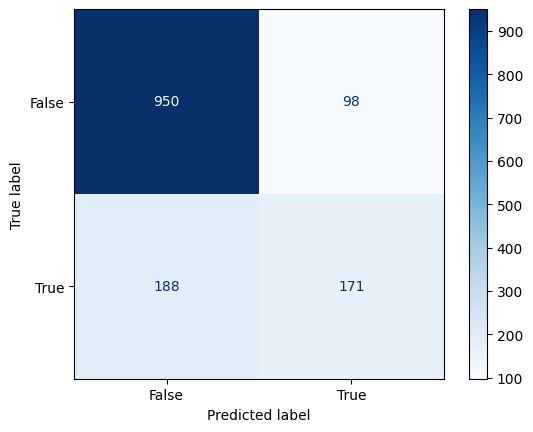

In [65]:
rc =RidgeClassifier()
model0=rc.fit(x_train, y_train)
print("train accuracy:",model0.score(x_train, y_train),"\n","test accuracy:",model0.score(x_test,y_test))
#auc roc
pred_prob0 = model0.decision_function((x_test))
auc_score0 = roc_auc_score(y_test, pred_prob0)
print("auc roc score :", auc_score0)

precision, recall,_= precision_recall_curve(y_test,pred_prob0)
auc_score0 = auc(recall, precision)
print("auc score from precision recall curve :", auc_score0)
'''The best model would be selected from the highest recall and precison values for the churn prediction. Hence these
   values are not calculated for other classifiers. predict function was used to predict the response for the test set.'''
rcpred = rc.predict(x_test)
print("\n")
print("classification report for ridge classifier")
print(classification_report(y_test,rcpred))
print("\n")
print("confusion matrix for ridge classifier")
ConfusionMatrixDisplay.from_estimator(rc, x_test, y_test,cmap="Blues")

train accuracy: 0.8060444444444445 
 test accuracy: 0.8031272210376688


classification report for logistic regression
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1048
        True       0.65      0.51      0.57       359

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



confusion matrix for logistic regression


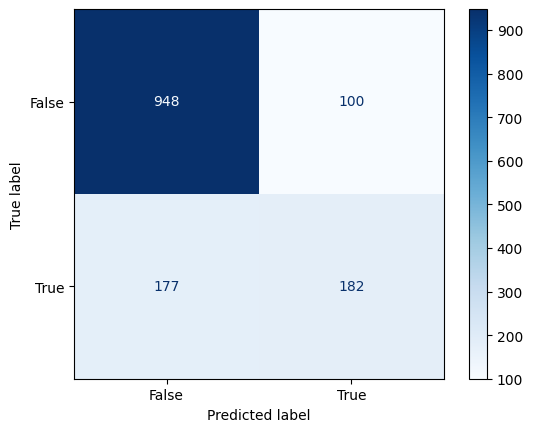

In [66]:
#logistic regression
lr = LogisticRegression(max_iter=2000,penalty='l2')
model1=lr.fit(x_train, y_train)
print("train accuracy:",model1.score(x_train, y_train),"\n","test accuracy:",model1.score(x_test,y_test))
lrpred = lr.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test,cmap="Blues")

train accuracy: 0.8055111111111111 
 test accuracy: 0.8017057569296375


classification report for support vector machines 
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1048
        True       0.65      0.49      0.56       359

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



confusion matrix for support vector machines


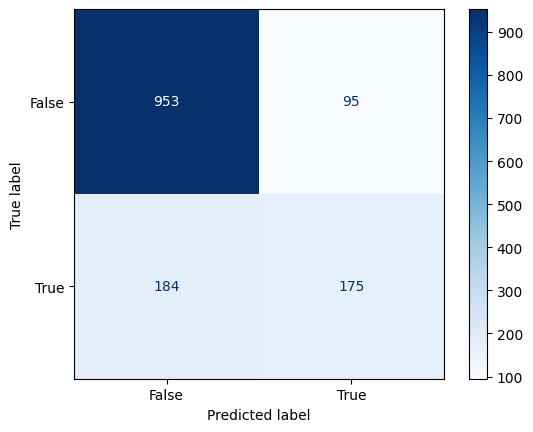

In [67]:
#support vector machines
svm =LinearSVC()
model2=svm.fit(x_train, y_train)
print("train accuracy:",model2.score(x_train, y_train),"\n","test accuracy:",model2.score(x_test,y_test))
svmpred = svm.predict(x_test)
print("\n")
print("classification report for support vector machines ")
print(classification_report(y_test,svmpred))
print("\n")
print("confusion matrix for support vector machines")
ConfusionMatrixDisplay.from_estimator(svm, x_test, y_test,cmap="Blues")

train accuracy: 0.9976888888888888 
 test accuracy: 0.7270788912579957


classification report for decision tree classifier
              precision    recall  f1-score   support

       False       0.82      0.81      0.82      1048
        True       0.47      0.49      0.48       359

    accuracy                           0.73      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407



confusion matrix for decision tree classifier


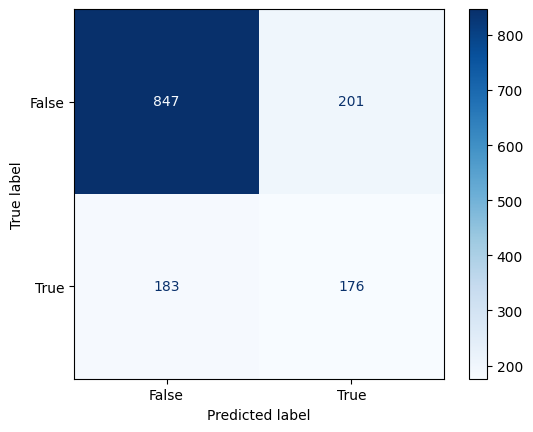

In [68]:
#decision tree classifier
dt=DecisionTreeClassifier()
model3=dt.fit(x_train, y_train)
print("train accuracy:",model3.score(x_train, y_train),"\n","test accuracy:",model3.score(x_test,y_test))

dtpred = dt.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test,dtpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test,cmap="Blues")

train accuracy: 0.9975111111111111 
 test accuracy: 0.7924662402274343


classification report for random forest classifier
              precision    recall  f1-score   support

       False       0.83      0.90      0.87      1048
        True       0.62      0.48      0.54       359

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



confusion matrix for random forest classifier


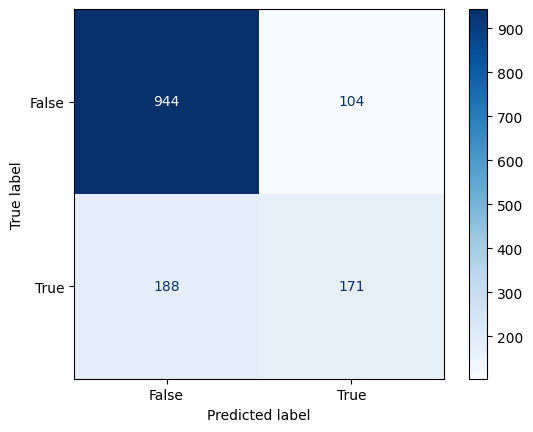

In [69]:
#random forest classifier
rf=RandomForestClassifier(random_state=1234)
model4=rf.fit(x_train, y_train)
print("train accuracy:",model4.score(x_train, y_train),"\n","test accuracy:",model4.score(x_test,y_test))

rfpred = rf.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test,cmap="Blues")

train accuracy: 0.8296888888888889 
 test accuracy: 0.8017057569296375


classification report for gradient boosting classifier
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1048
        True       0.64      0.52      0.57       359

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



confusion matrix for gradient boosting classifier


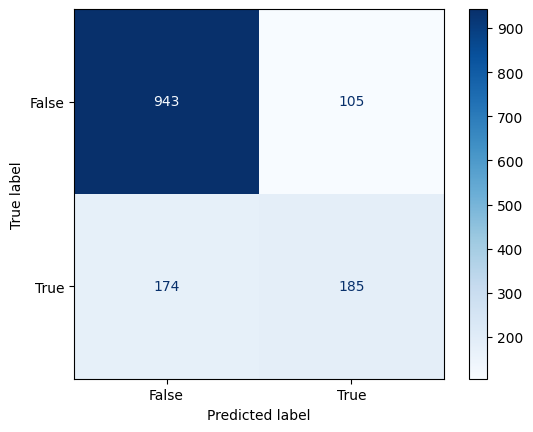

In [70]:
# gradient boost classifier 
gbm=GradientBoostingClassifier()
model5=gbm.fit(x_train, y_train)
print("train accuracy:",model5.score(x_train, y_train),"\n","test accuracy:",model5.score(x_test,y_test))

gbmpred = gbm.predict(x_test)
print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(y_test,gbmpred))
print("\n")
print("confusion matrix for gradient boosting classifier")
ConfusionMatrixDisplay.from_estimator(gbm, x_test, y_test,cmap="Blues")


train accuracy: 0.8087111111111112 
 test accuracy: 0.7995735607675906


classification report for adaboost classifier
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1048
        True       0.63      0.52      0.57       359

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



confusion matrix for adaboost classifier


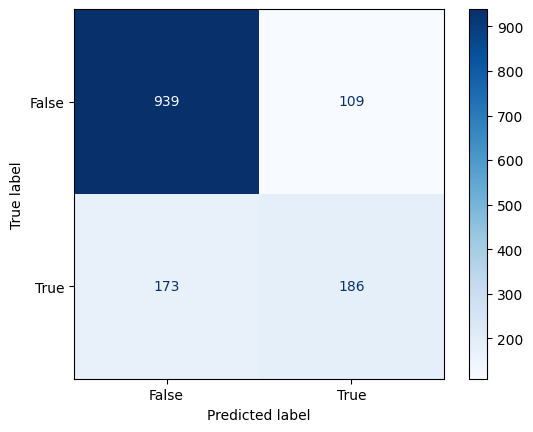

In [71]:
# adaboost classifier 
ada=AdaBoostClassifier()
model6=ada.fit(x_train, y_train)
print("train accuracy:",model6.score(x_train, y_train),"\n","test accuracy:",model6.score(x_test,y_test))

adapred = ada.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(y_test,adapred))
print("\n")
print("confusion matrix for adaboost classifier")
ConfusionMatrixDisplay.from_estimator(ada, x_test, y_test,cmap="Blues")

train accuracy: 0.9352888888888888 
 test accuracy: 0.7782515991471215


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

       False       0.84      0.88      0.85      1048
        True       0.58      0.50      0.53       359

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.77      0.78      0.77      1407



confusion matrix for extreme gradient boosting classifier


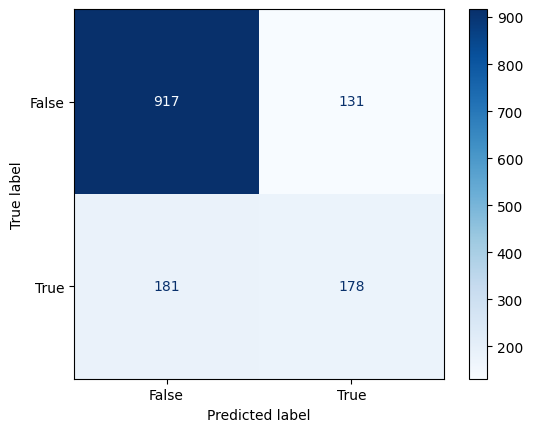

In [72]:

# extreme gradient boost classifier
xgb = XGBClassifier(random_state=1234)
model7=xgb.fit(x_train.values, y_train)
print("train accuracy:",model7.score(x_train.values, y_train),"\n","test accuracy:",model7.score(x_test.values,y_test))
xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(y_test,xgbpred))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
ConfusionMatrixDisplay.from_estimator(xgb, x_test.values, y_test,cmap="Blues")

train accuracy: 0.9352888888888888 
 test accuracy: 0.7782515991471215


classification report for extreme gradient boosting classifier
              precision    recall  f1-score   support

       False       0.84      0.88      0.85      1048
        True       0.58      0.50      0.53       359

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.77      0.78      0.77      1407



confusion matrix for extreme gradient boosting classifier


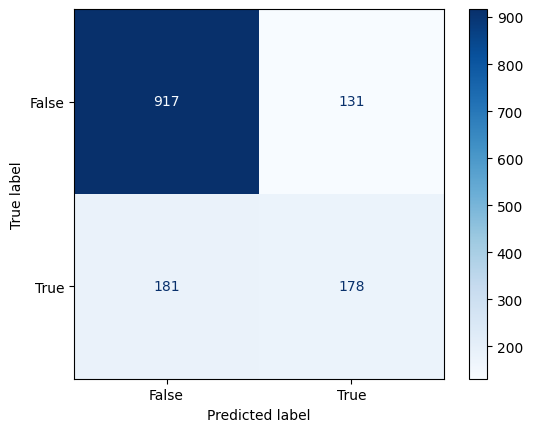

In [73]:

# extreme gradient boost classifier
xgb = XGBClassifier(random_state=1234)
model7=xgb.fit(x_train.values, y_train)
print("train accuracy:",model7.score(x_train.values, y_train),"\n","test accuracy:",model7.score(x_test.values,y_test))
xgbpred = xgb.predict(x_test.values)
print("\n")
print("classification report for extreme gradient boosting classifier")
print(classification_report(y_test,xgbpred))
print("\n")
print("confusion matrix for extreme gradient boosting classifier")
ConfusionMatrixDisplay.from_estimator(xgb, x_test.values, y_test,cmap="Blues")

train accuracy: 0.9976888888888888 
 test accuracy: 0.7803837953091685


classification report for extra tree classifier
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1048
        True       0.59      0.47      0.52       359

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



confusion matrix for extra tree classifier


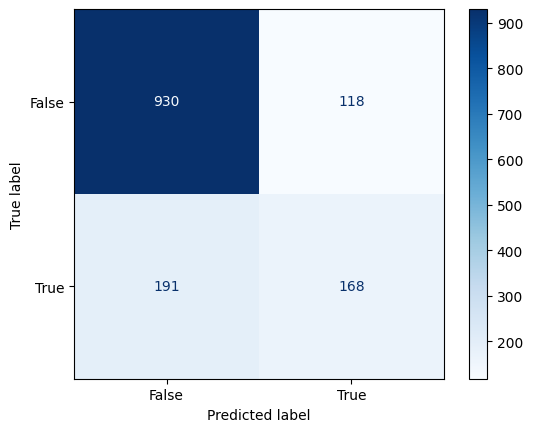

In [74]:
# extra tree classifier
extree = ExtraTreesClassifier()
model8=extree.fit(x_train, y_train)
print("train accuracy:",model8.score(x_train, y_train),"\n","test accuracy:",model8.score(x_test,y_test))

extpred = extree.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(y_test,extpred))
print("\n")
print("confusion matrix for extra tree classifier")
ConfusionMatrixDisplay.from_estimator(extree, x_test, y_test,cmap="Blues")

train accuracy: 0.8067555555555556 
 test accuracy: 0.8031272210376688


classification report for voting classifier
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1048
        True       0.64      0.51      0.57       359

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



confusion matrix for voting classifier


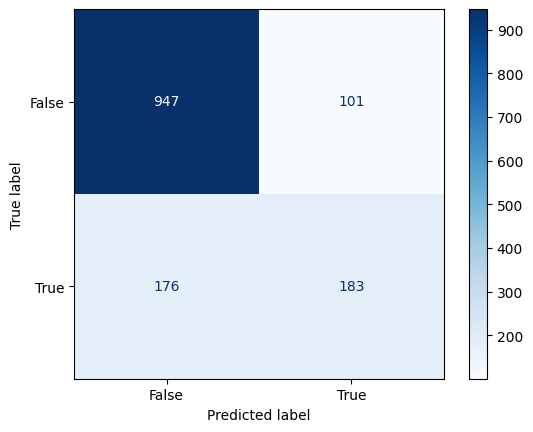

In [75]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = LogisticRegression(max_iter=2000,penalty='l2')

vc = VotingClassifier(estimators=[('ada', clf1),('lr', clf2)], voting='soft')
model9=vc.fit(x_train, y_train)
print("train accuracy:",model9.score(x_train, y_train),"\n","test accuracy:",model9.score(x_test,y_test))

vcpred = vc.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(y_test,vcpred))
print("\n")
print("confusion matrix for voting classifier")
ConfusionMatrixDisplay.from_estimator(vc, x_test, y_test,cmap="Blues")

train accuracy: 0.8051555555555555 
 test accuracy: 0.8024164889836531


classification report for stacking classifier
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      1048
        True       0.65      0.49      0.56       359

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



confusion matrix for stacking classifier


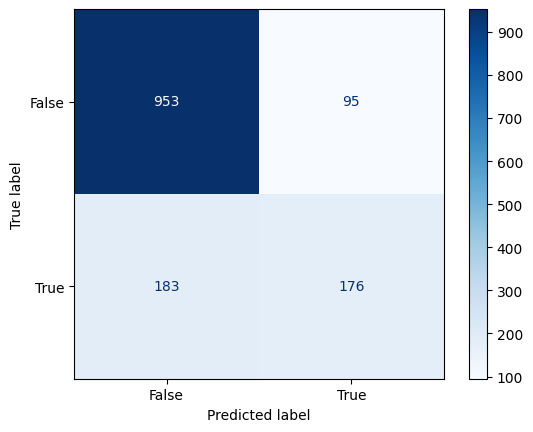

In [76]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('ada', AdaBoostClassifier()),('ext', make_pipeline(LogisticRegression(max_iter=2000,penalty='l2')))]
sc= StackingClassifier( estimators=estimators)

model10=sc.fit(x_train, y_train)
print("train accuracy:",model10.score(x_train, y_train),"\n","test accuracy:",model10.score(x_test,y_test))

scpred = sc.predict(x_test)
print("\n")
print("classification report for stacking classifier")
print(classification_report(y_test,scpred))
print("\n")
print("confusion matrix for stacking classifier")
ConfusionMatrixDisplay.from_estimator(sc, x_test, y_test,cmap="Blues")

In [77]:
!pip3 install catboost


train accuracy: 0.8707555555555555 
 test accuracy: 0.7960199004975125


classification report for cat boost classifier
              precision    recall  f1-score   support

       False       0.84      0.89      0.87      1048
        True       0.62      0.52      0.57       359

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



confusion matrix for cat boost classifier


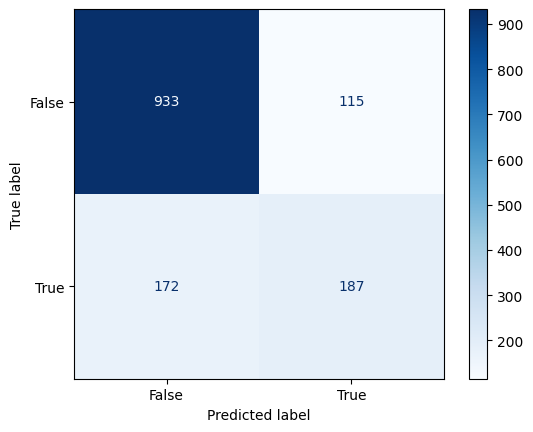

In [78]:
from catboost import CatBoostClassifier

cc = CatBoostClassifier(silent=True )
model11=cc.fit(x_train, y_train)
print("train accuracy:",model11.score(x_train, y_train),"\n","test accuracy:",model11.score(x_test,y_test))

ccpred = cc.predict(x_test)
print("\n")
print("classification report for cat boost classifier")
print(classification_report(y_test,ccpred))
print("\n")
print("confusion matrix for cat boost classifier")
ConfusionMatrixDisplay.from_estimator(cc, x_test, y_test,cmap="Blues")

##### Oversampling to reduce the effect of class imbalancedness.



In [79]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_train1, y_train1 = oversample.fit_resample(x_train, y_train)

<Axes: xlabel='Churn_Yes', ylabel='count'>

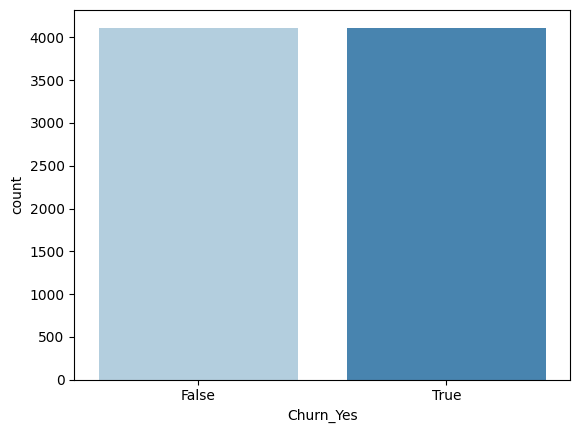

In [80]:
sns.countplot(x=y_train1,palette='Blues')


train accuracy: 0.7899149453219927 
 test accuracy: 0.7555081734186212


classification report for logistic regression
              precision    recall  f1-score   support

       False       0.89      0.77      0.82      1048
        True       0.51      0.72      0.60       359

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.76      0.77      1407



confusion matrix for logistic regression


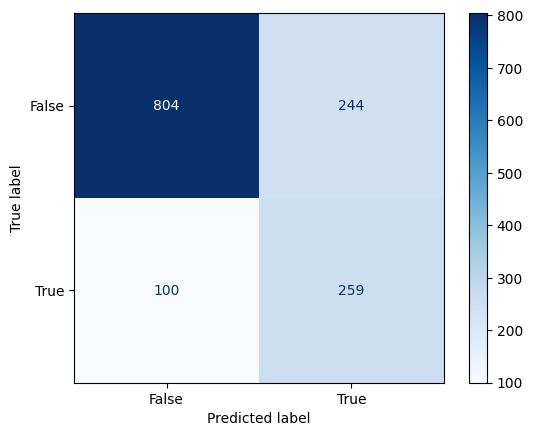

In [81]:
#logistic regression with resampling
lrw = LogisticRegression(max_iter=20000,penalty='l2')
model12=lrw.fit(x_train1, y_train1)
print("train accuracy:",model12.score(x_train1, y_train1),"\n","test accuracy:",model12.score(x_test,y_test))

lrwpred = lrw.predict(x_test)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrwpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lrw, x_test, y_test,cmap="Blues")

train accuracy: 0.8001215066828675 
 test accuracy: 0.7583511016346838


classification report for support vector machine classifier
              precision    recall  f1-score   support

       False       0.89      0.77      0.83      1048
        True       0.52      0.73      0.61       359

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



confusion matrix for support vector machine classifier


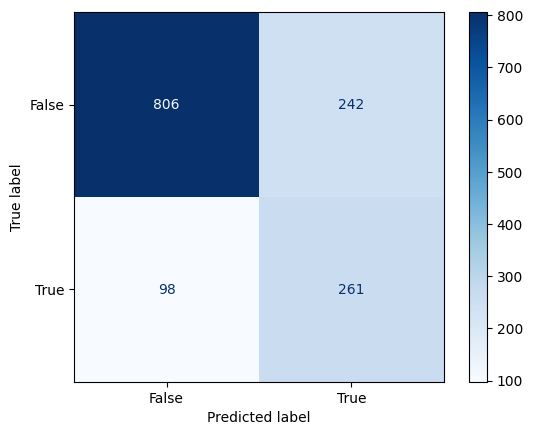

In [82]:
#suport vector machine
svmw = LinearSVC()
model13=svmw.fit(x_train1, y_train1)
print("train accuracy:",model13.score(x_train1, y_train1),"\n","test accuracy:",model13.score(x_test,y_test))

svmwpred = svmw.predict(x_test)
print("\n")
print("classification report for support vector machine classifier")
print(classification_report(y_test,svmwpred))
print("\n")
print("confusion matrix for support vector machine classifier")
ConfusionMatrixDisplay.from_estimator(svmw, x_test, y_test,cmap="Blues")

train accuracy: 0.9984204131227218 
 test accuracy: 0.7171286425017769


classification report for decision tree classifier
              precision    recall  f1-score   support

       False       0.83      0.78      0.80      1048
        True       0.45      0.54      0.49       359

    accuracy                           0.72      1407
   macro avg       0.64      0.66      0.65      1407
weighted avg       0.74      0.72      0.72      1407



confusion matrix for decision tree classifier


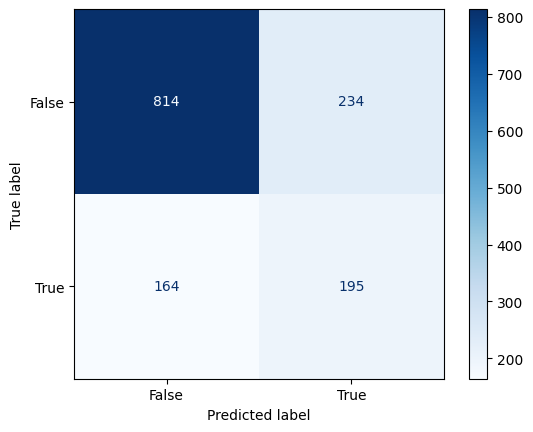

In [83]:
#decision tree classifier
dtw=DecisionTreeClassifier()
model14=dtw.fit(x_train1, y_train1)
print("train accuracy:",model14.score(x_train1, y_train1),"\n","test accuracy:",model14.score(x_test,y_test))

dtwpred = dtw.predict(x_test)
print("\n")
print("classification report for decision tree classifier")
print(classification_report(y_test,dtwpred))
print("\n")
print("confusion matrix for decision tree classifier")
ConfusionMatrixDisplay.from_estimator(dtw, x_test, y_test,cmap="Blues")

train accuracy: 0.9984204131227218 
 test accuracy: 0.7725657427149965


classification report for random forest classifier
              precision    recall  f1-score   support

       False       0.87      0.82      0.84      1048
        True       0.55      0.64      0.59       359

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.79      0.77      0.78      1407



confusion matrix for random forest classifier


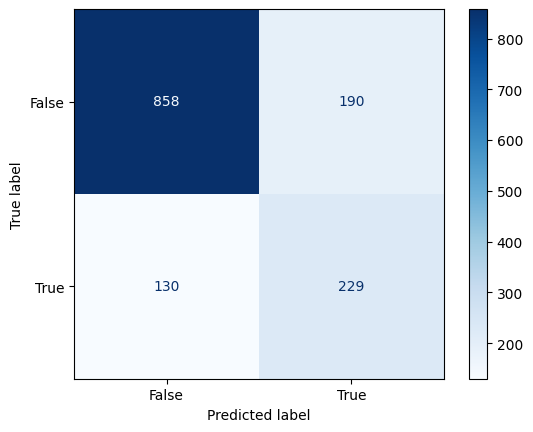

In [84]:
rfw=RandomForestClassifier()
model15=rfw.fit(x_train1, y_train1)
print("train accuracy:",model15.score(x_train1, y_train1),"\n","test accuracy:",model15.score(x_test,y_test))

rfwpred = rfw.predict(x_test)
print("\n")
print("classification report for random forest classifier")
print(classification_report(y_test,rfwpred))
print("\n")
print("confusion matrix for random forest classifier")
ConfusionMatrixDisplay.from_estimator(rfw, x_test, y_test,cmap="Blues")

train accuracy: 0.9866342648845686 
 test accuracy: 0.7690120824449183


classification report for bagging classifier
              precision    recall  f1-score   support

       False       0.85      0.83      0.84      1048
        True       0.54      0.58      0.56       359

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.77      0.77      1407



confusion matrix for bagging classifier


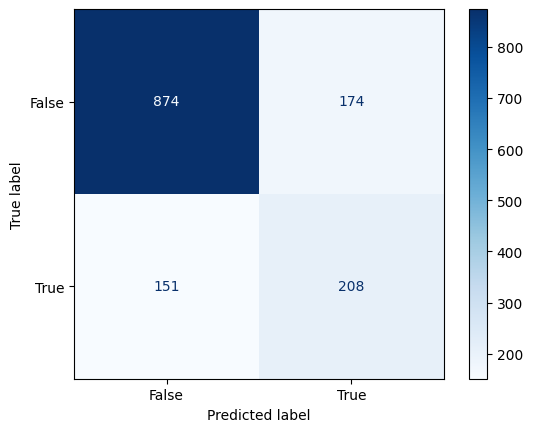

In [85]:
bgw=BaggingClassifier()
model16=bgw.fit(x_train1, y_train1)
print("train accuracy:",model16.score(x_train1, y_train1),"\n","test accuracy:",model16.score(x_test,y_test))

bgwpred = bgw.predict(x_test)
print("\n")
print("classification report for bagging classifier")
print(classification_report(y_test,bgwpred))
print("\n")
print("confusion matrix for bagging classifier")
ConfusionMatrixDisplay.from_estimator(bgw, x_test, y_test,cmap="Blues")

train accuracy: 0.7899149453219927 
 test accuracy: 0.7491115849324804


classification report for adaboost classifier
              precision    recall  f1-score   support

       False       0.89      0.76      0.82      1048
        True       0.51      0.72      0.60       359

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



confusion matrix for adaboost classifier


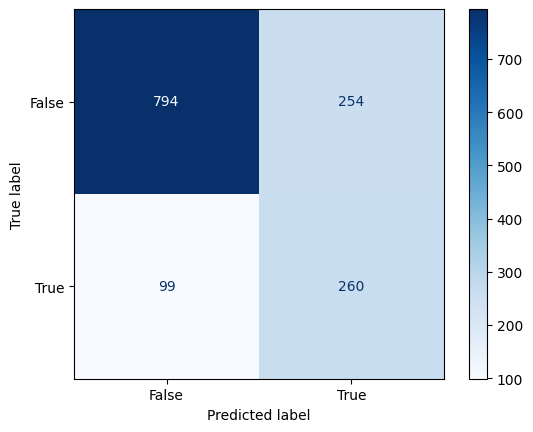

In [86]:
adaw=AdaBoostClassifier(random_state=12)
model17=adaw.fit(x_train1, y_train1)
print("train accuracy:",model17.score(x_train1, y_train1),"\n","test accuracy:",model17.score(x_test,y_test))

adawpred = adaw.predict(x_test)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(y_test,adawpred))
print("\n")
print("confusion matrix for adaboost classifier")
ConfusionMatrixDisplay.from_estimator(adaw, x_test, y_test,cmap="Blues")

train accuracy: 0.9984204131227218 
 test accuracy: 0.7704335465529495


classification report for extra tree classifier
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1048
        True       0.55      0.55      0.55       359

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



confusion matrix for extra tree classifier


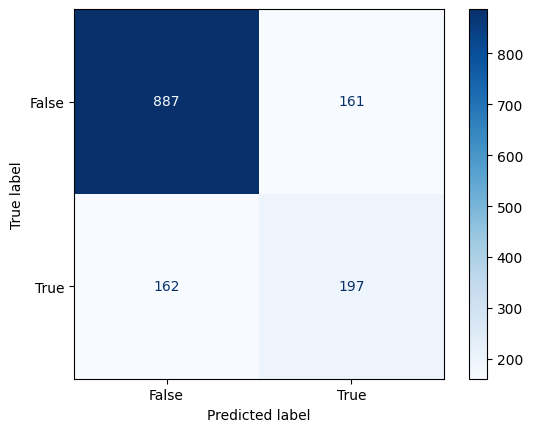

In [87]:
extreew = ExtraTreesClassifier()
model18=extreew.fit(x_train1, y_train1)
print("train accuracy:",model18.score(x_train1, y_train1),"\n","test accuracy:",model18.score(x_test,y_test))

extwpred = extreew.predict(x_test)
print("\n")
print("classification report for extra tree classifier")
print(classification_report(y_test,extwpred))
print("\n")
print("confusion matrix for extra tree classifier")
ConfusionMatrixDisplay.from_estimator(extreew, x_test, y_test,cmap="Blues")

train accuracy: 0.7897934386391251 
 test accuracy: 0.7562189054726368


classification report for voting classifier
              precision    recall  f1-score   support

       False       0.89      0.77      0.82      1048
        True       0.52      0.72      0.60       359

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.76      0.77      1407



confusion matrix for voting classifier


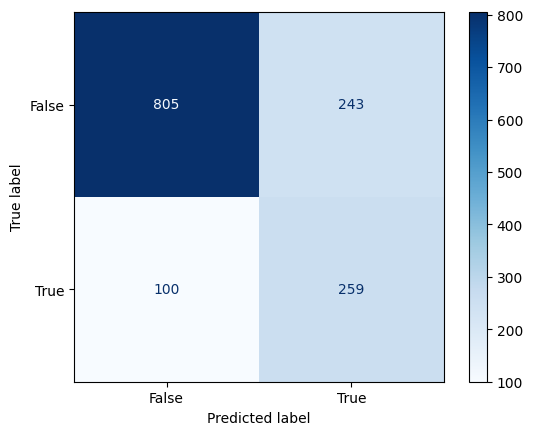

In [88]:
# voting classifer
from sklearn.ensemble import VotingClassifier
clf1 = AdaBoostClassifier()
clf2 = LogisticRegression(max_iter=2000,penalty='l2')

vcw = VotingClassifier(estimators=[('ada', clf1),('lr', clf2)], voting='soft')
model19=vcw.fit(x_train1, y_train1)
print("train accuracy:",model19.score(x_train1, y_train1),"\n","test accuracy:",model19.score(x_test,y_test))

vcwpred = vcw.predict(x_test)
print("\n")
print("classification report for voting classifier")
print(classification_report(y_test,vcwpred))
print("\n")
print("confusion matrix for voting classifier")
ConfusionMatrixDisplay.from_estimator(vcw, x_test, y_test,cmap="Blues")

train accuracy: 0.7885783718104495 
 test accuracy: 0.757640369580668


classification report for stacking classifier
              precision    recall  f1-score   support

       False       0.89      0.77      0.83      1048
        True       0.52      0.71      0.60       359

    accuracy                           0.76      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.76      0.77      1407



confusion matrix for stacking classifier


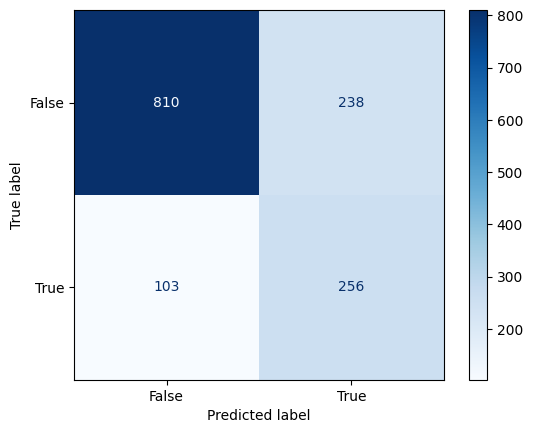

In [89]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('ada', AdaBoostClassifier()),('ext', make_pipeline(LogisticRegression(max_iter=2000,penalty='l2')))]
scw= StackingClassifier( estimators=estimators)

model20=scw.fit(x_train1, y_train1)
print("train accuracy:",model20.score(x_train1, y_train1),"\n","test accuracy:",model20.score(x_test,y_test))

scwpred = scw.predict(x_test)
print("\n")
print("classification report for stacking classifier")
print(classification_report(y_test,scwpred))
print("\n")
print("confusion matrix for stacking classifier")
ConfusionMatrixDisplay.from_estimator(scw, x_test, y_test,cmap="Blues")

##### According the context and the business value of the problem identifying the customers who will be churn in near future would be beneficial. hence the model that can identify the customers with high probability to churn is the best model. logistic regression model had 0.63 F1 score for identifying churning customers and it has high precision and recall values.Adaboost classifier have 0.65 F1 score and high precision and recall values. So the feature importance will be checked with those models. Ada boost has the highest recall of 0.80. Hence it can predict the churning customers well from actual churning customers.

##### Feature importances

In [90]:
#coefficient values of logistic regression model
model12.coef_

array([[ 0.03593958, -4.03622456, -9.55867007,  1.52795865,  0.14903934,
         0.08645988, -0.20020901,  1.44928406,  0.8407698 ,  3.29998066,
        -2.77654345,  0.18327618,  0.46198716,  0.57302516,  0.26165774,
         1.14575911,  1.29972553, -0.60088481, -1.02671297,  0.55254975,
         0.43380689,  0.83560289,  0.45990412]])

In [91]:
# select variables with coefficient large than one and smaller than negative one
(np.round(model12.coef_,decimals=3)>1) | (np.round(model12.coef_,decimals=3)<-1)

array([[False,  True,  True,  True, False, False, False,  True, False,
         True,  True, False, False, False, False,  True,  True, False,
         True, False, False, False, False]])

In [92]:
x_train1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [93]:
# important variables from logistic regression
imp_col_lr = ['tenure','MonthlyCharges','PhoneService_Yes','InternetService_Fiber optic','InternetService_No', 'OnlineSecurity_Yes','TotalCharges','TechSupport_Yes',
              'Contract_One year', 'Contract_Two year']

In [95]:
# filtering the subset of the dataframe with only the important features.
x_train_imp=x_train1.filter(items=imp_col_lr)
x_test_imp=x_test.filter(items=imp_col_lr)
y_train_imp=y_train1

In [96]:
x_train_imp.shape

(8230, 10)

train accuracy: 0.7665856622114217 
 test accuracy: 0.7448471926083866


classification report for logistic regression
              precision    recall  f1-score   support

       False       0.90      0.74      0.81      1048
        True       0.50      0.77      0.61       359

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.76      1407



confusion matrix for logistic regression


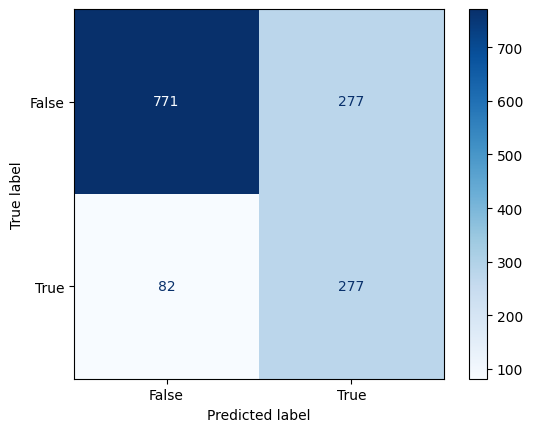

In [97]:
#logistic regression with important features
lr = LogisticRegression(max_iter=2000,penalty='l2')
model21=lr.fit(x_train_imp, y_train_imp)
print("train accuracy:",model21.score(x_train_imp, y_train_imp),"\n","test accuracy:",model21.score(x_test_imp,y_test))

lrpred = lr.predict(x_test_imp)
print("\n")
print("classification report for logistic regression")
print(classification_report(y_test,lrpred))
print("\n")
print("confusion matrix for logistic regression")
ConfusionMatrixDisplay.from_estimator(lr, x_test_imp, y_test,cmap="Blues")

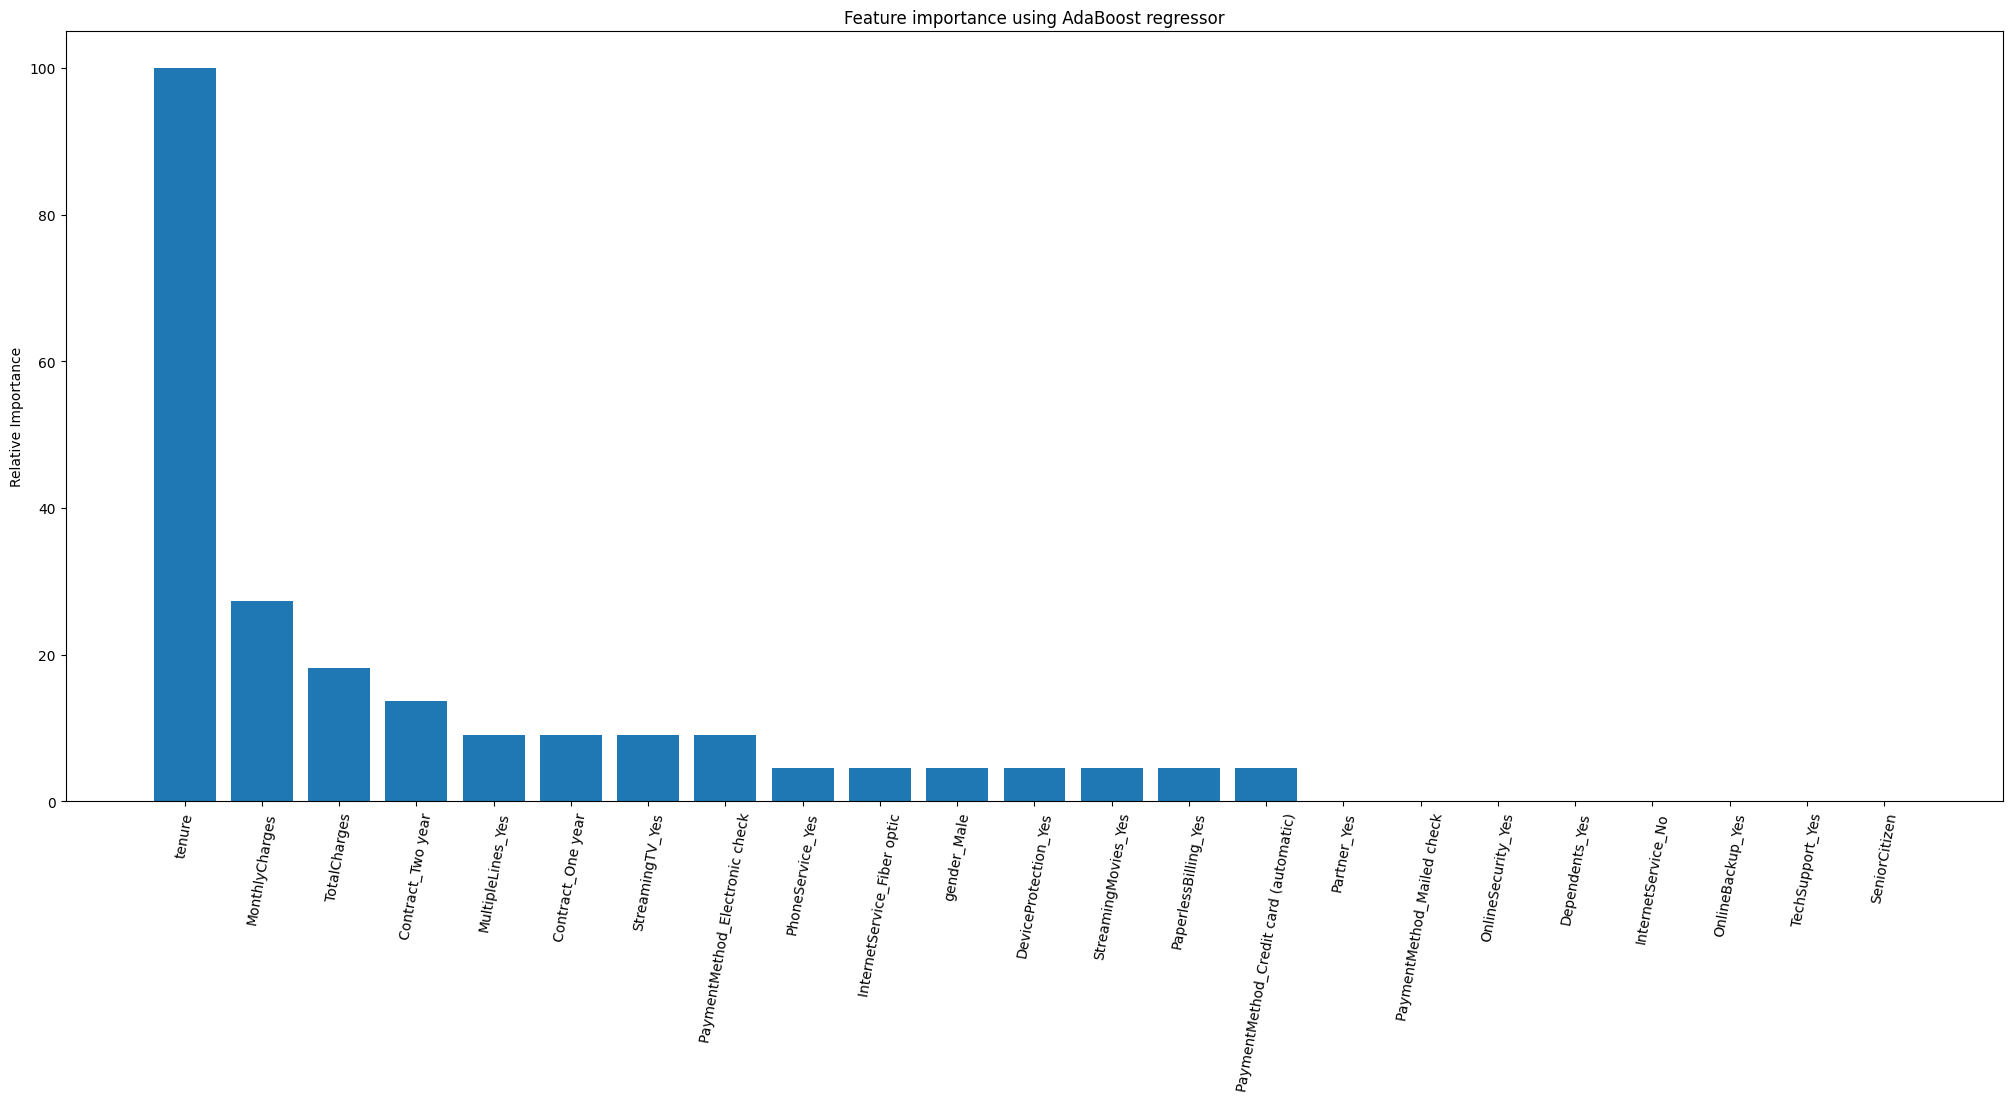

In [98]:
#feature importance from adaboost classifier
feature_importances = adaw.feature_importances_
feature_names = x_train1.columns

#Next normalize the values of the relative feature importance, sort them and arrange the ticks on the X axis for the bar graph:

feature_importances = 100.0 * (feature_importances / max(feature_importances))
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0]) + 0.5

#Finally plot the bar graph:

plt.figure(figsize=(25, 10))
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted],rotation = 80)
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()


In [99]:
x_train1.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [100]:
# important features from Adaboost
imp_col_adaboost = ['MonthlyCharges','tenure','InternetService_Fiber optic','gender_Male','InternetService_No','Contract_One year', 'Contract_Two year',
                    'TotalCharges','PhoneService_Yes', 'InternetService_Fiber optic','InternetService_No', 'Dependents_Yes', 'OnlineSecurity_Yes',
                    'TechSupport_Yes','OnlineBackup_Yes']

In [101]:
# filtering the subset of the dataframe with only the important features.

x_train_imp1=x_train1.filter(items=imp_col_adaboost)
x_test_imp1=x_test.filter(items=imp_col_adaboost)
y_train_imp1=y_train1

In [102]:
x_train_imp1.shape

(8230, 13)

train accuracy: 0.7792223572296476 
 test accuracy: 0.738450604122246


classification report for adaboost classifier
              precision    recall  f1-score   support

       False       0.91      0.72      0.80      1048
        True       0.49      0.78      0.60       359

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.74      0.75      1407



confusion matrix for adaboost classifier


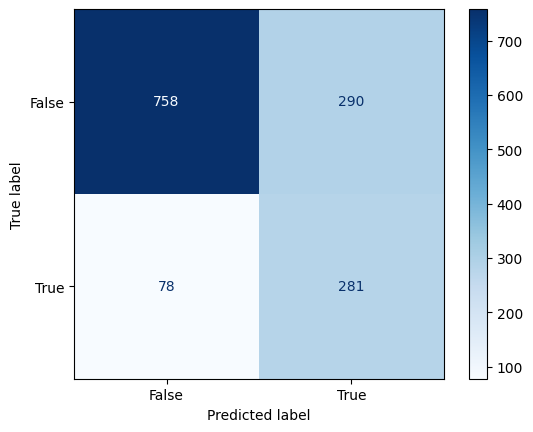

In [103]:
# adaboost classifier with important features
adaw=AdaBoostClassifier(random_state=12)
model22=adaw.fit(x_train_imp1, y_train1)
print("train accuracy:",model22.score(x_train_imp1, y_train1),"\n","test accuracy:",model22.score(x_test_imp1,y_test))

adawpred = adaw.predict(x_test_imp1)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(y_test,adawpred))
print("\n")
print("confusion matrix for adaboost classifier")
ConfusionMatrixDisplay.from_estimator(adaw, x_test_imp1, y_test,cmap="Blues")

train accuracy: 0.7654921020656136 
 test accuracy: 0.7533759772565742


classification report for stacking classifier
              precision    recall  f1-score   support

       False       0.90      0.75      0.82      1048
        True       0.51      0.77      0.61       359

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



confusion matrix for stacking classifier


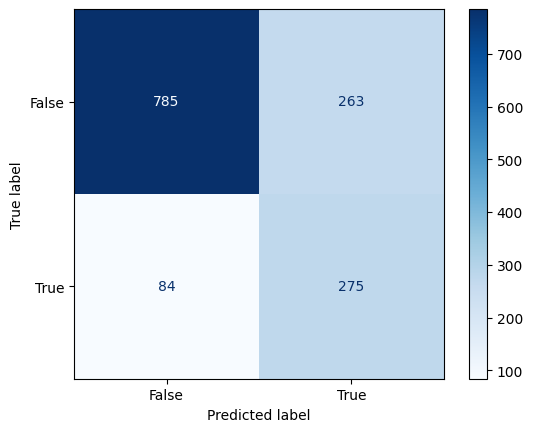

In [104]:
# stacking classifier 
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('ada', AdaBoostClassifier()),('ext', make_pipeline(StandardScaler(),LogisticRegression(max_iter=2000,penalty='l2')))]
scw= StackingClassifier( estimators=estimators)

model23=scw.fit(x_train_imp1, y_train_imp1)
print("train accuracy:",model23.score(x_train_imp1, y_train_imp1),"\n","test accuracy:",model23.score(x_test_imp1,y_test))

scwpred = scw.predict(x_test_imp1)
print("\n")
print("classification report for stacking classifier")
print(classification_report(y_test,scwpred))
print("\n")
print("confusion matrix for stacking classifier")
ConfusionMatrixDisplay.from_estimator(scw, x_test_imp1, y_test,cmap="Blues")


##### from this we can see that adaboost model works well than stacking classifier from precision and auc values. Also it is the more simpler model.

##### Hyper parameter tuning with Optuna for Adaboost classifier

In [106]:
!pip install optuna


In [107]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def objective(trial):
    x, y = x_train_imp1,y_train_imp1
    n_estimators = trial.suggest_int("n_estimators", 1000,5000)
    learning_rate = trial.suggest_float("learning_rate", 0.01,2)
    algorithm = trial.suggest_categorical("algorithm", ["SAMME", "SAMME.R"])

    adab = AdaBoostClassifier(n_estimators=n_estimators,
            learning_rate = learning_rate,
            algorithm=algorithm
        )

    score = cross_val_score(adab, x, y, n_jobs=-1, cv=StratifiedKFold(n_splits=5))
    accuracy = score.mean()
    return accuracy

In [123]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

[I 2025-01-29 16:56:56,398] A new study created in memory with name: no-name-2aa7d2b3-cabb-4eb8-80d0-ace157d6b512
[I 2025-01-29 16:58:05,660] Trial 0 finished with value: 0.778007290400972 and parameters: {'n_estimators': 4895, 'learning_rate': 0.936167024712246, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.778007290400972.
[I 2025-01-29 16:58:33,118] Trial 1 finished with value: 0.7885783718104495 and parameters: {'n_estimators': 1684, 'learning_rate': 1.3732627276140534, 'algorithm': 'SAMME.R'}. Best is trial 1 with value: 0.7885783718104495.
[I 2025-01-29 16:59:20,789] Trial 2 finished with value: 0.776913730255164 and parameters: {'n_estimators': 3488, 'learning_rate': 0.20251289371058917, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.7885783718104495.
[I 2025-01-29 16:59:38,295] Trial 3 finished with value: 0.7783718104495747 and parameters: {'n_estimators': 1246, 'learning_rate': 0.41345688897618227, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.788578371810

In [124]:
# best hyperparameter values
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.8006075334143379
Best hyperparameters: {'n_estimators': 3151, 'learning_rate': 1.8076326432006615, 'algorithm': 'SAMME.R'}


train accuracy: 0.8603888213851761 
 test accuracy: 0.7562189054726368


classification report for adaboost classifier
              precision    recall  f1-score   support

       False       0.85      0.81      0.83      1048
        True       0.52      0.59      0.55       359

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.69      1407
weighted avg       0.77      0.76      0.76      1407



confusion matrix for adaboost classifier


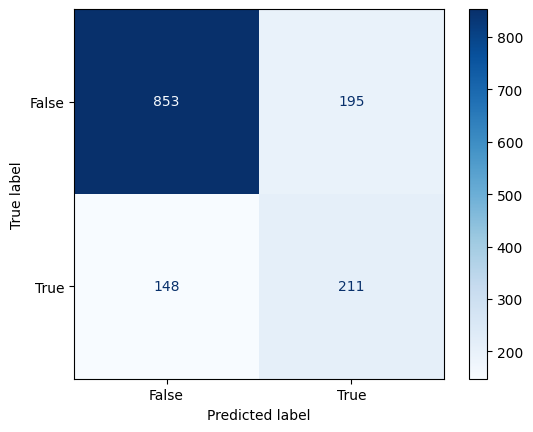

In [125]:
adaw=AdaBoostClassifier(n_estimators = 1577, learning_rate = 1.9293987, algorithm = 'SAMME')
model24=adaw.fit(x_train_imp1, y_train1)
print("train accuracy:",model24.score(x_train_imp1, y_train1),"\n","test accuracy:",model24.score(x_test_imp1,y_test))

adawpred = adaw.predict(x_test_imp1)
print("\n")
print("classification report for adaboost classifier")
print(classification_report(y_test,adawpred))
print("\n")
print("confusion matrix for adaboost classifier")
ConfusionMatrixDisplay.from_estimator(adaw, x_test_imp1, y_test,cmap="Blues")


In [112]:
!pip install autokeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 6.0 MB/s eta 0:00:00


In [153]:
import tensorflow as tf
import autokeras as ak

In [154]:
# change the data frame to a numpy array
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.to_numpy()

if isinstance(x_test, pd.DataFrame):
    x_test = x_test.to_numpy()

if isinstance(y_train, pd.DataFrame):
    y_train = y_train.to_numpy()

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.to_numpy()

In [157]:
import autokeras as ak
import tensorflow as tf
!pip install --upgrade autokeras
import autokeras as ak

# Define the classifier using the correct class
clf = ak.AutoModel(
    inputs=ak.StructuredDataInput(),
    outputs=ak.ClassificationHead(),
    max_trials=10,
    seed=1234
)

# Train the classifier with your training data
clf.fit(x_train, y_train, epochs=50, validation_split=0.2)

# Export the model after training
model = clf.export_model()

# Get the model summary
model.summary()


AttributeError: module 'autokeras' has no attribute 'StructuredDataInput'

In [158]:
# model summary
model = clf.export_model()
model.summary()

NameError: name 'clf' is not defined

In [159]:
# predictions from best neural network from AutoKeras
predicted = clf.predict(x_test)

NameError: name 'clf' is not defined

In [121]:
print("classification report for neural network")
print(classification_report(predicted,y_test))

classification report for neural network


NameError: name 'predicted' is not defined

##### The best performing model was the ADA boost classifier with oversampling with all features. It had a recall value of 0.79 which was the highest among all the models. Some of the tree based models had overfitted but the selected final model had not overfitted.